<a href="https://colab.research.google.com/github/AmyRahim/Predictive-Model/blob/main/CO2_Emission_Prediction_Using_Non_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CO2 Emission Prediction using Non-Linear Regression

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


--2024-08-13 15:40:40--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.05s   

2024-08-13 15:40:40 (1.44 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
import pandas as pd

df = pd.read_csv('/content/FuelConsumption.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.corr(numeric_only = True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


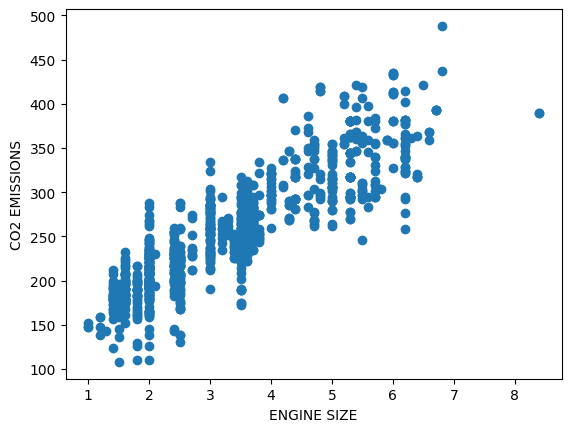

In [5]:
#to observe the scatter plot between the ENGINESIZE and CO2EMISSIONS
import matplotlib.pyplot as plt
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()

**Data Splitting**

In [6]:
import numpy as np

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

##Comparison Between All The Regression
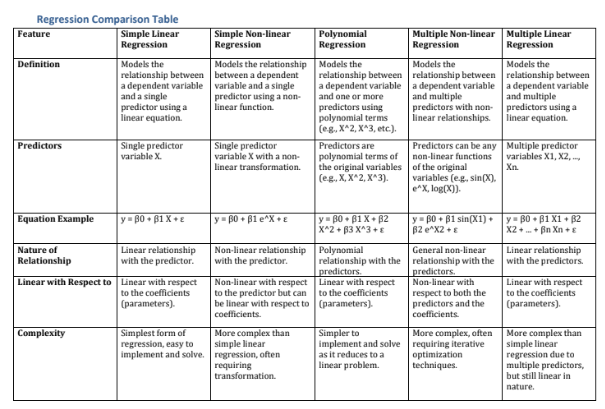

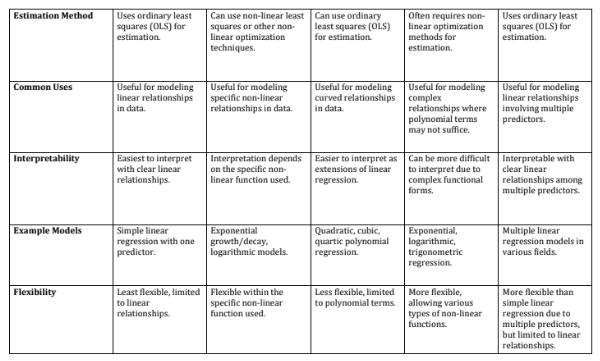

**Polynomial Regression**

In [12]:
#importing polynomial function from sklearn library
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#convert data frame into array
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#create polynomial features
poly = PolynomialFeatures(degree=2)

#training the model
train_x_poly = poly.fit_transform(train_x)

#create linear regression object
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

#testing model
test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x_poly = poly.fit_transform(test_x)

#model prediction
test_y_pred = clf.predict(test_x_poly)


#model evaluation
from sklearn.metrics import r2_score
print('The R2 score is: ', round((r2_score(test_y, test_y_pred)*100), 2) , '%')
print('The MSE is: ', (np.mean(test_y_pred - test_y)**2))

The R2 score is:  76.86 %
The MSE is:  6.782709516458388e-26


Text(0, 0.5, 'CO2 Emission')

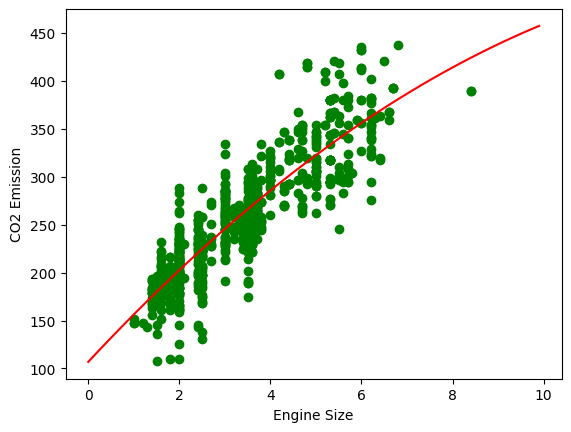

In [13]:
#polynomial degree = 2

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')

In [22]:
#create polynomial features
poly4 = PolynomialFeatures(degree=4)

#training the model
train_x_poly4 = poly4.fit_transform(train_x)

#create linear regression object
clf4 = linear_model.LinearRegression()
train_y_ = clf4.fit(train_x_poly4, train_y)

#testing model
test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x_poly4 = poly4.fit_transform(test_x)

#model prediction
test_y_pred = clf4.predict(test_x_poly4)


#model evaluation
from sklearn.metrics import r2_score
print('The R2 score is: ', round((r2_score(test_y, test_y_pred)*100), 2) , '%')
print('The MSE is: ', (np.mean(test_y_pred - test_y)**2))


The R2 score is:  77.0 %
The MSE is:  1.0269723275159136e-25


Text(0, 0.5, 'Emission')

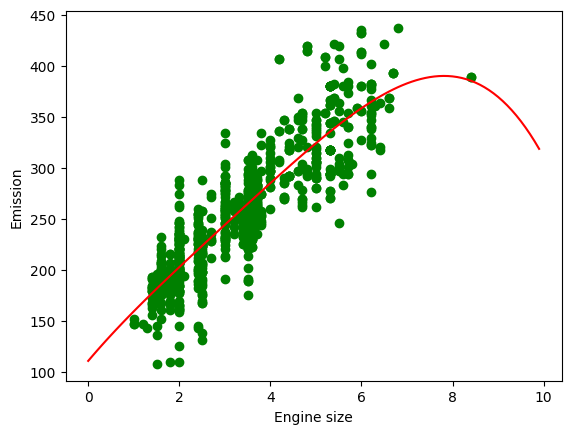

In [26]:

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX + clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [24]:
#create polynomial features
poly12 = PolynomialFeatures(degree=5)

#training the model
train_x_poly12 = poly12.fit_transform(train_x)

#create linear regression object
clf12 = linear_model.LinearRegression()
train_y_ = clf12.fit(train_x_poly12, train_y)

#testing model
test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x_poly12 = poly12.fit_transform(test_x)

#model prediction
test_y_pred = clf12.predict(test_x_poly12)


#model evaluation
from sklearn.metrics import r2_score
print('The R2 score is: ', round((r2_score(test_y, test_y_pred)*100), 2) , '%')
print('The MSE is: ', (np.mean(test_y_pred - test_y)**2))

The R2 score is:  77.08 %
The MSE is:  8.121126922756555e-24


Text(0, 0.5, 'CO2 Emissions')

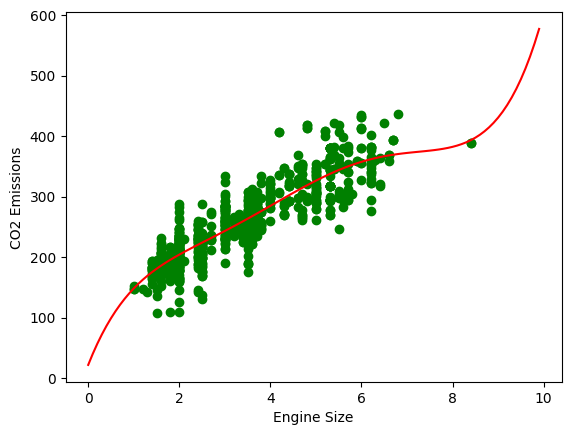

In [27]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf12.intercept_[0] + clf12.coef_[0][1]*XX + clf12.coef_[0][2]*np.power(XX, 2) + clf12.coef_[0][3]*np.power(XX, 3) + clf12.coef_[0][4]*np.power(XX, 4) + clf12.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')


We explored polynomial regression to model the relationship between features like engine size and fuel consumption with CO2 emissions.
* By increasing the degree of the polynomial, we observed how the model fit the training data more closely.
* However, higher degrees can lead to overfitting, where the model performs well on training data but poorly on unseen data.

**Further Steps:**

To rigorously determine the best model, we should:
1. Split the data into training, validation, and test sets.
2. Train models on the training set.
3. Evaluate performance on the validation set to tune hyperparameters (like polynomial degree).
4. Finally, assess the chosen model's generalization ability on the held-out test set.


##Multiple Non-Linear Regression

In [28]:
df.corr(numeric_only = True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [30]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [38]:
#convert data frame into array
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY','ENGINESIZE','FUELCONSUMPTION_HWY',
                               'FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#create polynomial features
poly13 = PolynomialFeatures(degree=2)

#training the model
train_x_poly13 = poly13.fit_transform(train_x)

#create linear regression object
clf13 = linear_model.LinearRegression()
train_y_ = clf13.fit(train_x_poly13, train_y)

#testing model
test_x = np.asanyarray(train[['FUELCONSUMPTION_CITY','ENGINESIZE','FUELCONSUMPTION_HWY',
                               'FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x_poly13 = poly13.fit_transform(test_x)

#model prediction
test_y_pred = clf13.predict(test_x_poly13)


#model evaluation
from sklearn.metrics import r2_score
print('The R2 score is: ', round((r2_score(test_y, test_y_pred)*100), 2) , '%')
print('The MSE is: ', round((((np.mean((test_y_pred - test_y)**2)))*100), 2))
print('The MAE is: ', round((((np.mean(np.absolute(test_y_pred - test_y))))*100),2))

The R2 score is:  90.55 %
The MSE is:  36762.25
The MAE is:  1086.03


In [34]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#Conclusion
* Based on the provided code and evaluations, its challenging to definitively declare a single "best" predicting model without a more rigorous evaluation process
* The multiple linear regression models shows more promising results. It incorporate multiple features and achieves a high R2 score, indicating a good fit to the training dataset


**Recommendation**

* To make a more informed decision about the best model, it is recommended that:

1. Splitting the data into training, validation and test sets. This allow for proper model evaluation and hyperparameter tuning.
2. To perform cross-validation on the training set to assess model stability and generalization.
3. To compare the performance evaluation of different models (include polynomial regression with varying degrees and multiple non-linear regression) on the validation dataset.
4. To select the model with the best performance on the validation set and evaluating its final performance on the held-out test set.

